In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
def shuffle_examples(X,y):
  p = np.random.permutation(len(X))
  return X[p],y[p]

def split_train_validation_test(X,y,p_t,p_tv):
  n = int(p_t*len(X))
  m = int(p_tv*len(X))
  return X[:n],y[:n],X[n:m],y[n:m],X[m:],y[m:]   

def scale(x):
  mu = np.mean(x,axis=0)
  st = np.std(x,axis=0)
  return (x-mu)/st,mu,st  

def sigmoid(x):
  return 1/(1+np.exp(-x))

def relu(x):
  return np.maximum(0,x)  

def sigmoid_p(x):
  return sigmoid(x)*(1-sigmoid(x))

def relu_p(x):
  return 1*(x >= 0)    

def error(y,y_hat):
  return -np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))/len(y)  

def accuracy_recall_precision(y_hat,y):
  y_hat_cat = 1*(y_hat > 0.5)
  correct_predictions = np.sum(y_hat_cat == y)
  predictions = len(y)
  true_positives = np.sum((y_hat_cat == 1) & (y == 1))
  positives = np.sum(y)
  predicted_positives = np.sum(y_hat_cat)
  accuracy = correct_predictions/predictions
  recall = true_positives/positives
  precision = true_positives/predicted_positives
  return accuracy, recall, precision  

def h(x,act):
  if act == 'sigmoid':
    return sigmoid(x)
  if act == 'relu':
    return relu(x)
  if act == 'identity':
    return x
  if act == 'tanh':
    return np.tanh(x)
  return 'Problem' 

def h_p(x,act):
  if act == 'sigmoid':
    return sigmoid_p(x)
  if act == 'relu':
    return relu_p(x)
  if act == 'identity':
    return 1
  if act == 'tanh':
    return 1/(np.cosh(x))**2
  return 'Problem'  

def As_Zs(X,W,b,act):
  A = [X]
  Z = [0]
  for l in range(1,len(b)):
    Z.append(np.matmul(A[-1],W[l])+b[l])
    A.append(h(Z[-1],act[l]))
  return A,Z 

def gradients(A,Z,act,W,y):
  y_hat = A[-1]
  l = len(W)-1
  DJ_DW = []
  DJ_Db = []
  DJ_DZ = (y_hat - y.reshape(-1,1))/len(y)
  while l > 1:
    DJ_DA = np.matmul(DJ_DZ,W[l].T)
    DJ_DW.insert(0,np.matmul(A[l-1].T,DJ_DZ)) 
    DJ_Db.insert(0,np.sum(DJ_DZ,axis=0))
    DJ_DZ = DJ_DA*h_p(Z[l-1],act[l-1])
    l = l-1
  DJ_DA = np.matmul(DJ_DZ,W[1].T)
  DJ_DW.insert(0,np.matmul(A[0].T,DJ_DZ)) 
  DJ_Db.insert(0,np.sum(DJ_DZ,axis=0)) 
  DJ_DW.insert(0,0) 
  DJ_Db.insert(0,0)  
  return DJ_DW,DJ_Db  

def update_parameters(W,b,DJ_DW,DJ_Db,c):
  for l in range(1,len(b)):
    W[l] = W[l] - c*DJ_DW[l]
    b[l] = b[l] - c*DJ_Db[l]
  return W, b  

def initialize_W_and_b(n):
  W = [0]
  b = [0]
  for l in range(1,len(n)):
    W.append(0.01*np.random.randn(n[l-1],n[l]))
    b.append(np.zeros(n[l]))
  return W, b 

def steepest(n,act,X,y,epochs,c):
  W, b = initialize_W_and_b(n)
  J_list = []
  for i in range(epochs):
    A, Z = As_Zs(X,W,b,act)
    y_hat = A[-1]
    J_list.append(error(y,y_hat.reshape(-1)))
    DJ_DW, DJ_Db = gradients(A,Z,act,W,y)
    W, b = update_parameters(W,b,DJ_DW,DJ_Db,c)
  return W, b, J_list         

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/flower.csv')

In [ ]:
df.head()

,Unnamed: 0,feature 1,feature 2,label
0,0,1.204442,3.576114,0
1,1,0.158710,-1.482171,0
2,2,0.095247,-1.279955,0
3,3,0.349178,-2.064380,0
4,4,0.694150,2.889109,0


In [ ]:
X = df[['feature 1','feature 2']].values
y = df['label'].values

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


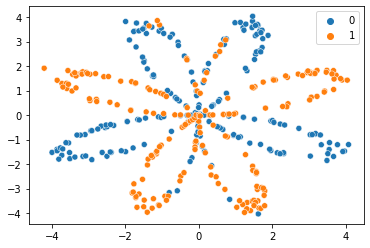

In [ ]:
sns.scatterplot(X[:,0],X[:,1],hue = y)

In [ ]:
np.random.seed(7)
X, y = shuffle_examples(X,y)
p_t = 0.8
p_tv = 0.9
X_train, y_train, X_val, y_val, X_test, y_test = split_train_validation_test(X,y,p_t,p_tv)
X_train_scaled, X_train_mean, X_train_std = scale(X_train)

Geometry of the network

In [ ]:
n = [X.shape[1],4,1]
act = [None,'tanh','sigmoid']
c = 1
epochs = 100000


In [ ]:
W, b, J_list = steepest(n,act,X_train_scaled,y_train,epochs,c)

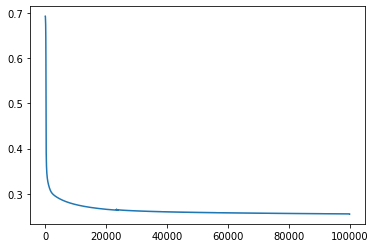

In [ ]:
plt.plot(J_list)

In [ ]:
def predict(X,W,b,act):
  A,Z = As_Zs(X,W,b,act)
  return A[-1].reshape(-1)

def scale_predict(X,X_train_mean,X_train_std,W,b,act):
  return predict((X-X_train_mean)/X_train_std,W,b,act)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


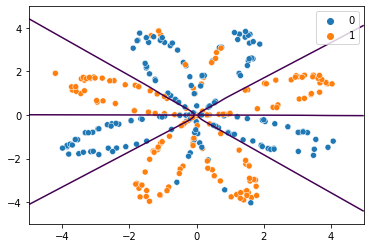

In [ ]:
sns.scatterplot(X_train[:,0],X_train[:,1],hue=y_train)
xl, xr, dx = -5, 5, 0.01
yl, yr, dy = -5, 5, 0.01
u = np.arange(xl,xr,dx)
v = np.arange(yl,yr,dy)
u_r = np.ones((len(v),1))*u.reshape(1,len(u))
v_r = v.reshape(len(v),1)*np.ones((1,len(u)))
u_r = u_r.reshape(-1)
v_r = v_r.reshape(-1)
p_grid = np.column_stack((u_r,v_r))
f_grid = scale_predict(p_grid,X_train_mean,X_train_std,W,b,act)
f_grid = f_grid.reshape((len(v),len(u)))
plt.contour(u,v,f_grid,levels=[0.5])

In [ ]:
y_hat = scale_predict(X_train,X_train_mean,X_train_std,W,b,act)
print('accuracy, recall, precision =', accuracy_recall_precision(y_hat,y_train))
print('c e error =',error(y_train,y_hat))


accuracy, recall, precision = (0.896875, 0.9, 0.8944099378881988)
c e error = 0.2552448733571139


In [ ]:
y_hat = scale_predict(X_val,X_train_mean,X_train_std,W,b,act)
print('accuracy, recall, precision =', accuracy_recall_precision(y_hat,y_val))
print('c e error =',error(y_val,y_hat))

accuracy, recall, precision = (0.9, 0.8695652173913043, 0.9523809523809523)
c e error = 0.2502689735387086


In [ ]:
y_hat = scale_predict(X_test,X_train_mean,X_train_std,W,b,act)
print('accuracy, recall, precision =', accuracy_recall_precision(y_hat,y_test))
print('c e error =',error(y_test,y_hat))

accuracy, recall, precision = (0.975, 1.0, 0.9444444444444444)
c e error = 0.1621408991084487
